In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Rain_DF = pd.read_csv('Data/train.csv')
Rain_DF.head(4)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1


In [3]:
Rain_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


There are no values with 'NaN'

In [4]:
import sklearn as sk
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer

In [5]:
X_train = Rain_DF.drop(columns = ['id','day','rainfall'])
y_train = Rain_DF['rainfall']  #.astype(bool)

In [6]:
y_train

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

In [7]:
from xgboost import XGBClassifier
model_Rain = XGBClassifier()

In [8]:
model_Rain.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.3,0.5],
         'colsample_bytree': [0.4,0.5],
         'gamma': [0.1],
         'learning_rate': [0.05,0.04,0.03],
         'max_depth':[2,3,4,5],
         'min_child_weight': [1],
         'n_estimators': [400,500,600],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [9]:
params = {'base_score': [0.5],
         'booster': ['gbtree'], # 'dart'
         'colsample_bylevel': [1],
         'colsample_bynode': [0.3,0.8],
         'colsample_bytree': [0.4,0.8],
         'eval_metric': ['auc'],
         'gamma': [0.2],
         'learning_rate': [0.2, 0.3, 0.5],
         'max_depth': [2,3,4,5],
         'n_estimators': [300,500,900],
         'n_jobs': [-1],
         'num_parallel_tree': [1, 2],
         'reg_alpha': [0.5,1],
         'reg_lambda': [0.5,1],
         'verbosity': [2]}

In [10]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_Rain,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [11]:
Rain_results = grid_solver.fit(X_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.3, colsample_bytree=0.4, eval_metric=auc, gamma=0.2, learning_rate=0.2, max_depth=2, n_estimators=300, n_jobs=-1, num_parallel_tree=1, reg_alpha=0.5, reg_lambda=1, verbosity=2; total time=   0.0s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.3, colsample_bytree=0.4, eval_metric=auc, gamma=0.2, learning_rate=0.2, max_depth=2, n_estimators=300, n_jobs=-1, num_parallel_tree=1, reg_alpha=1, reg_lambda=0.5, verbosity=2; total time=   0.0s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.3, colsample_bytree=0.4, eval_metric=auc, gamma=0.2, learning_rate=0.2, max_depth=2, n_estimators=300, n_jobs=-1, num_parallel_tree=2, reg_alpha=0.5, reg_lambda=0.5, verbosity=2; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.3, colsample_bytree=0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [12]:
Rain_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.8, colsample_bytree=0.4,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=2, random_state=None, ...)

In [13]:
y_pred_Rain = Rain_results.predict(X_train)

In [14]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

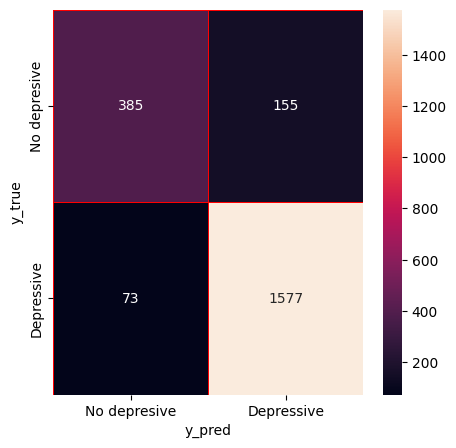

In [15]:
confusion(y_train,y_pred_Rain)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_Rain)

0.8958904109589041

In [17]:
Rain_test_DF = pd.read_csv('Data/test.csv')
Rain_test_DF.head(4)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6


In [18]:
Rain_test_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [19]:
# wind direction is one without direction
Rain_test_DF['winddirection'] = Rain_test_DF['winddirection'].fillna(
    Rain_test_DF['winddirection'].mean())

In [20]:
Rain_test_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  730 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [21]:
X_test = Rain_test_DF.drop(columns = ['id','day'])

In [22]:
Rain_stu = Rain_results.best_estimator_

In [23]:
y_pred_Rain = Rain_stu.predict(X_test)

In [24]:
Rain_test_DF['rainfall'] = y_pred_Rain
Rain_test_DF

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,1
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,1
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,1
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6,0
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3,1
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2,1
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9,1
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5,1



[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.8, colsample_bytree=0.8, eval_metric=auc, gamma=0.2, learning_rate=0.5, max_depth=2, n_estimators=900, n_jobs=-1, num_parallel_tree=2, reg_alpha=0.5, reg_lambda=1, verbosity=2; total time=   0.4s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.8, colsample_bytree=0.8, eval_metric=auc, gamma=0.2, learning_rate=0.5, max_depth=3, n_estimators=300, n_jobs=-1, num_parallel_tree=1, reg_alpha=1, reg_lambda=1, verbosity=2; total time=   0.0s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.8, colsample_bytree=0.8, eval_metric=auc, gamma=0.2, learning_rate=0.5, max_depth=3, n_estimators=300, n_jobs=-1, num_parallel_tree=1, reg_alpha=1, reg_lambda=1, verbosity=2; total time=   0.0s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.8, colsample_bytree=0.8, eval_metric=auc, gamma=0.2, learning_rate=0.5, max_depth=3, n_esti

In [25]:
Submission_Rain = Rain_test_DF[['id','rainfall']]

In [26]:
Submission_Rain.to_csv('Data/submission/Submission.1.Rain.csv', index=False)